In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set(style="whitegrid")

In [35]:
df = pd.read_csv("data/employee_attrition.csv")

In [37]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
df['Attrition'] = df['Attrition'].astype(str).str.strip().str.title()

In [40]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [42]:
df['Attrition'].value_counts()

Attrition
0    8003
1    1997
Name: count, dtype: int64

In [44]:
df['Attrition'].dtype

dtype('int64')

In [46]:
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,0
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,0
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,1
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,0
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,0


In [48]:
df.shape

(10000, 26)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 non-null  int64 
 13  Jo

In [52]:
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,...,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,39.561800,2.990800,11436.716700,57.032300,14.936200,7.451300,4.471900,2.502400,3.038000,...,49.588900,4.984400,44.473500,9.410200,2.493100,2.491400,2.505400,25.272000,2.516600,0.199700
std,2886.89568,11.454986,1.410643,4926.528302,24.703261,8.431657,4.042903,2.891617,1.112348,1.414764,...,28.801393,2.580043,8.611662,5.760335,1.120927,1.115101,1.116018,14.219474,1.113934,0.399795
min,1.00000,20.000000,1.000000,3000.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2500.75000,30.000000,2.000000,7182.500000,36.000000,8.000000,4.000000,2.000000,2.000000,2.000000,...,25.000000,3.000000,37.000000,4.000000,1.000000,1.000000,2.000000,13.000000,2.000000,0.000000
50%,5000.50000,40.000000,3.000000,11401.500000,57.000000,15.000000,7.000000,4.000000,2.000000,3.000000,...,49.000000,5.000000,45.000000,9.000000,2.000000,2.000000,3.000000,25.000000,2.000000,0.000000
75%,7500.25000,49.000000,4.000000,15679.500000,78.000000,22.000000,11.000000,7.000000,3.000000,4.000000,...,75.000000,7.000000,52.000000,14.000000,4.000000,3.000000,3.000000,37.000000,4.000000,0.000000
max,10000.00000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.000000,4.000000,5.000000,...,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000,1.000000


In [54]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Marital_Status', 'Department',
       'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate',
       'Years_at_Company', 'Years_in_Current_Role',
       'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction',
       'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime',
       'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked',
       'Attrition'],
      dtype='object')

In [56]:
df.isnull().sum()

Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

In [58]:
df[['Age','Monthly_Income','Years_at_Company','Department','Job_Role','Attrition']].head()

,Age,Monthly_Income,Years_at_Company,Department,Job_Role,Attrition
0,58,7332,24,Finance,Manager,0
1,48,6069,18,HR,Assistant,0
2,34,11485,6,Marketing,Manager,1
3,27,18707,12,HR,Manager,0
4,40,16398,3,HR,Analyst,0


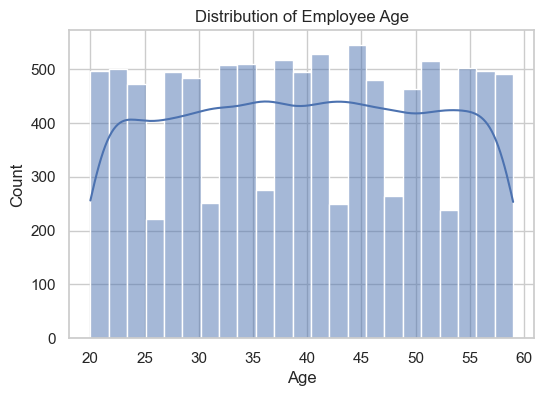

In [60]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Employee Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


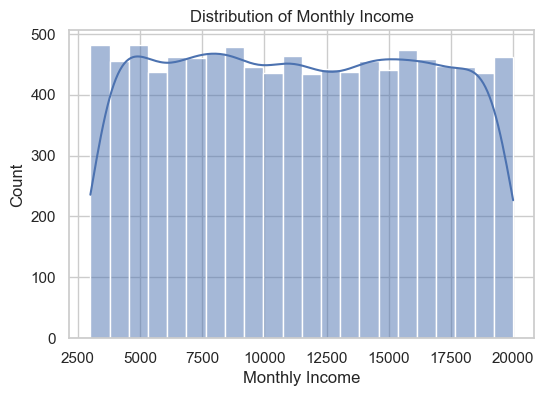

In [63]:
plt.figure(figsize=(6,4))
sns.histplot(df['Monthly_Income'], kde=True)
plt.title("Distribution of Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.show()


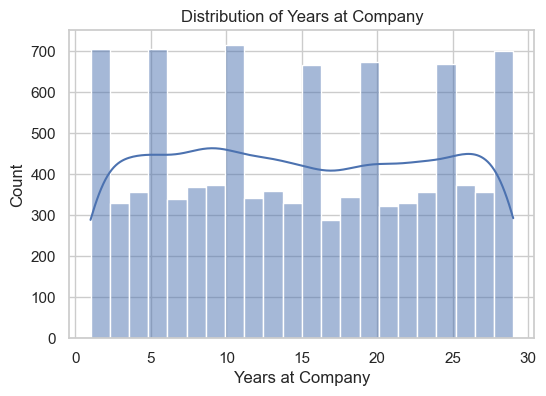

In [65]:
plt.figure(figsize=(6,4))
sns.histplot(df['Years_at_Company'], kde=True)
plt.title("Distribution of Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.show()

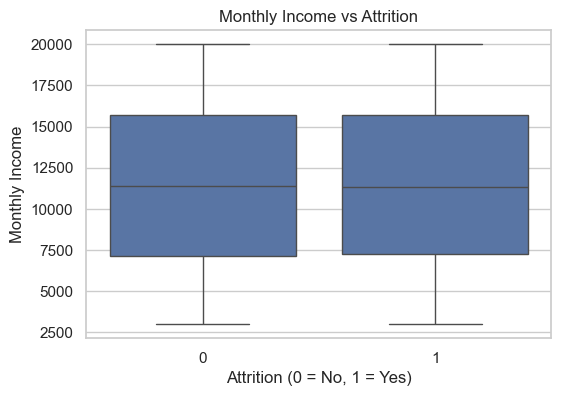

In [68]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='Monthly_Income', data=df)
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Monthly Income")
plt.show()

In [71]:
numeric_df = df[['Age', 'Monthly_Income', 'Years_at_Company', 'Attrition']]

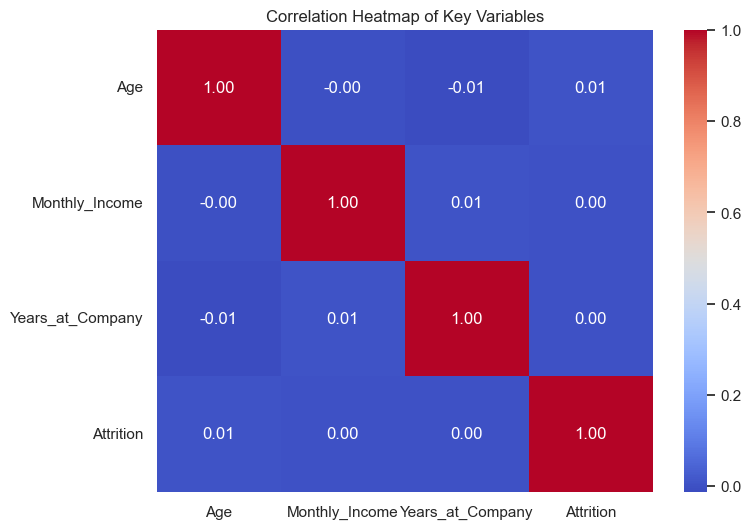

In [77]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Key Variables")
plt.show()

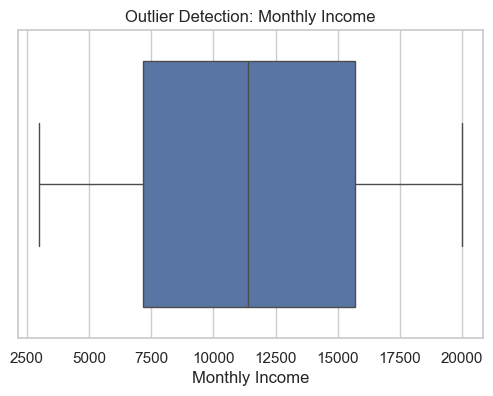

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Monthly_Income'])
plt.title("Outlier Detection: Monthly Income")
plt.xlabel("Monthly Income")
plt.show()

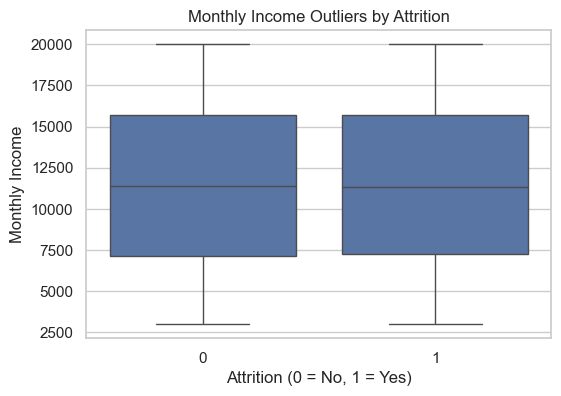

In [83]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='Monthly_Income', data=df)
plt.title("Monthly Income Outliers by Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Monthly Income")
plt.show()

In [85]:
attrition_yes = df[df['Attrition'] == 1]['Monthly_Income']
attrition_no = df[df['Attrition'] == 0]['Monthly_Income']

t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no)

t_stat, p_value

(0.013453236602104584, 0.9892664624356821)

In [92]:
sample_mean = df['Monthly_Income'].mean()
population_mean = 10000
std_dev = df['Monthly_Income'].std()
n = df.shape[0]

z_score = (sample_mean - population_mean) / (std_dev / np.sqrt(n))
z_score

29.162863012250764

In [93]:
contingency_table = pd.crosstab(df['Department'], df['Attrition'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

chi2, p

(1.9322774909297424, 0.7482133205494339)